# 1. Association between two random variables

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Import the housing information for analysis 
housing = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/data/housing.csv',index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [19]:
# Use covariance to calculate the association
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


In [15]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr() 

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


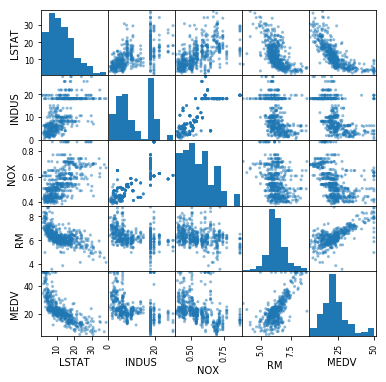

In [18]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(6, 6))


### Observe the association between LSTAT and MEDV:

LSTAT    1.000000
INDUS    0.603800
NOX      0.590879
RM      -0.613808
MEDV    -0.737663
Name: LSTAT, dtype: float64
LSTAT    1.000000
INDUS    0.603800
NOX      0.590879
RM      -0.613808
MEDV    -0.737663
Name: LSTAT, dtype: float64


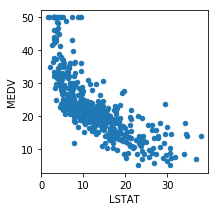

In [20]:
# This time we take a closer look at MEDV vs LSTAT. What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(3, 3))
temp = housing.corr()
print(temp['LSTAT'])         # get the column
print(temp.loc['LSTAT'])     # get the row

# 2. Simple linear regression model
Compare Least sqaure estimates & Simple linear regression, both models are
still based on the association between RM and MEDV. 

Sum of sqaured error of LSE is 22061.879196211798
Sum of sqaured error of LR is 170373.528047


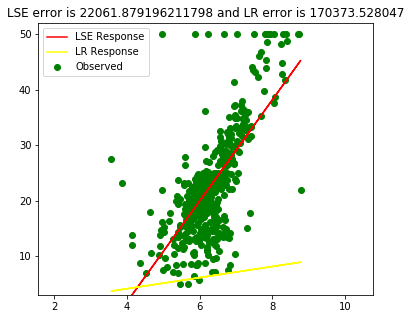

In [21]:
################ Input the formula of Least Square Estimates ##########
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()
# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]
housing['LSE_Response'] = b0_ols + b1_ols*housing['RM']
# Also want to know the error of guesS
housing['error1'] = housing['MEDV'] - housing['LSE_Response']

############### Input the formula of Linear Regression ################
b0 = 0.1
b1 = 1
# Assign the value of b0, b1 to get a straight line that can describe our data 
housing['LR_Response'] = b0 + b1*housing['RM']
# This show how far is our guess response from the true response
housing['error2'] = housing['MEDV'] - housing['LR_Response']  # the error


############## plot your estimated lineS together with the points #######
plt.figure(figsize=(6, 5))
# See if the error drops after you use least square method
print('Sum of sqaured error of LSE is',((housing['error1'])**2).sum())
print('Sum of sqaured error of LR is',((housing['error2'])**2).sum())

plt.title('LSE error is {}'.format((((housing['error1'])**2)).sum()) + ' and LR error is {}'.format((((housing['error2'])**2)).sum()))

plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['LSE_Response'], color='red', label='LSE Response')
plt.plot(housing['RM'], housing['LR_Response'], color='yellow', label='LR Response')
plt.legend()

plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

In [22]:
#Refer to the P-value of RM, Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        16:40:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Diagnostic of models

In [23]:
# Least square estimate
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()
# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,LSE_Response,error1,LR_Response,error2,BestResponse
0,4.98,2.31,0.538,6.575,24.0,25.175746,-1.175746,6.675,17.325,29.822595
1,9.14,7.07,0.469,6.421,21.6,23.774021,-2.174021,6.521,15.079,25.870390
2,4.03,7.07,0.469,7.185,34.7,30.728032,3.971968,7.285,27.415,30.725142
3,2.94,2.18,0.458,6.998,33.4,29.025938,4.374062,7.098,26.302,31.760696
4,5.33,2.18,0.458,7.147,36.2,30.382152,5.817848,7.247,28.953,29.490078


### Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

### 3.1  Linearity

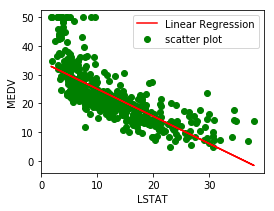

In [33]:
# you can check the scatter plot to have a fast check
plt.figure(figsize=(4, 3))
plt.scatter(housing['LSTAT'], housing['MEDV'], color='g', label='scatter plot')
plt.plot(housing['LSTAT'], housing['BestResponse'], color='r', label='Linear Regression')
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### 3.2  Independence

In [25]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

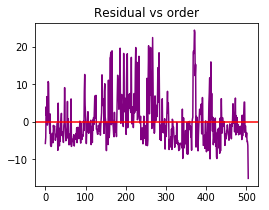

In [26]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(4, 3))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [27]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        16:47:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.3  Normality

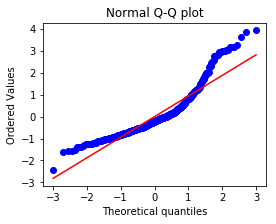

0   -0.937676
1   -0.687707
2    0.640115
3    0.263995
4    1.080572
Name: error, dtype: float64

In [30]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

plt.figure(figsize=(4, 3))
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()
z[0:5]

### 3.4 Equal variance

<Figure size 288x216 with 0 Axes>

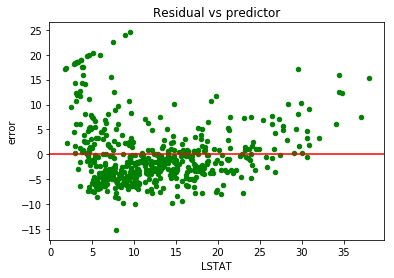

In [32]:
# Residual vs predictor plot
plt.figure(figsize=(4, 3))
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(6, 4), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

### We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.